In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

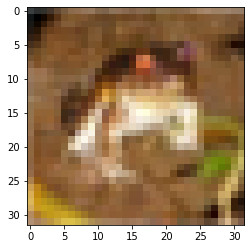

In [5]:
single_image = x_train[0]
plt.imshow(single_image)

In [7]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)

0.996078431372549


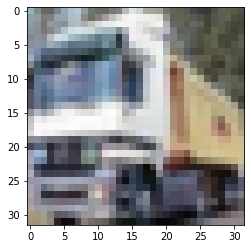

In [8]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)
# normalize the data since we know range(0,255)
x_train = x_train/255
x_test = x_test/255
scaled_image = x_train[1]
print(scaled_image.max())
plt.imshow(scaled_image)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 strides=(1,1),
                 padding='valid',
                 input_shape=(32,32,3),
                 activation='relu'
                 )
          )
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,
                 kernel_size=(4,4),
                 strides=(1,1),
                 padding='valid',
                 input_shape=(32,32,3),
                 activation='relu'
                 )
          )
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# output layer for multiclass
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [11]:
model.fit(x_train,
          y_cat_train,
          epochs=10,
          validation_data=(x_test, y_cat_test),
          callbacks=[early_stop]
          )

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4947 - accuracy: 0.4615 - val_loss: 1.2565 - val_accuracy: 0.5484
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1740 - accuracy: 0.5833 - val_loss: 1.1158 - val_accuracy: 0.6057
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0293 - accuracy: 0.6385 - val_loss: 1.0950 - val_accuracy: 0.6213
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9191 - accuracy: 0.6787 - val_loss: 1.0779 - val_accuracy: 0.6289
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8269 - accuracy: 0.7111 - val_loss: 0.9568 - val_accuracy: 0.6727
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7479 - accuracy: 0.7385 - val_loss: 0.9978 - val_accuracy: 0.6566


In [12]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.494725,0.46146,1.256455,0.5484
1,1.174019,0.58332,1.115754,0.6057
2,1.029277,0.63848,1.094976,0.6213
3,0.919053,0.67872,1.077877,0.6289
4,0.826946,0.71112,0.956807,0.6727
5,0.747936,0.73852,0.997766,0.6566


<AxesSubplot:>

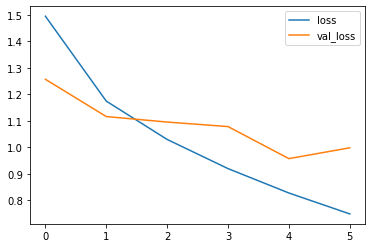

In [13]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

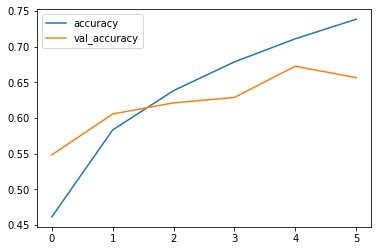

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

In [15]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9978 - accuracy: 0.6566


[0.9977663159370422, 0.6565999984741211]

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.71      0.82      0.76      1000
           2       0.62      0.48      0.54      1000
           3       0.48      0.40      0.44      1000
           4       0.54      0.70      0.61      1000
           5       0.67      0.45      0.54      1000
           6       0.66      0.82      0.73      1000
           7       0.81      0.60      0.69      1000
           8       0.76      0.77      0.76      1000
           9       0.66      0.79      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [17]:
confusion_matrix(y_test, predictions)

array([[741,  27,  31,  11,  30,   2,   8,   2,  81,  67],
       [ 21, 821,   2,   8,   7,   2,  10,   2,  29,  98],
       [ 86,  21, 479,  60, 138,  43, 111,  20,  17,  25],
       [ 38,  35,  59, 400, 111, 115, 136,  25,  36,  45],
       [ 29,   9,  52,  61, 700,   8,  73,  42,  17,   9],
       [ 24,  20,  59, 199,  94, 449,  56,  48,  24,  27],
       [ 12,  24,  31,  29,  51,   6, 817,   1,  11,  18],
       [ 26,  22,  43,  49, 136,  37,  20, 600,   4,  63],
       [ 77,  54,  10,   8,  16,   4,   9,   1, 771,  50],
       [ 30, 117,   8,   8,  11,   0,   6,   2,  30, 788]])

<AxesSubplot:>

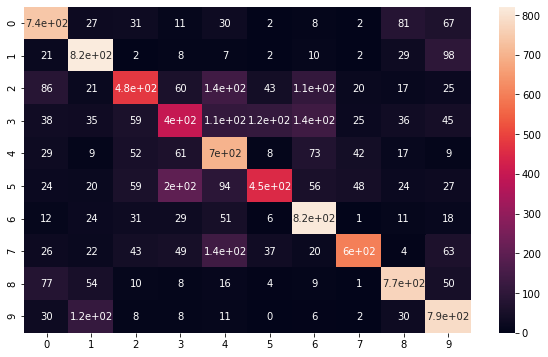

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

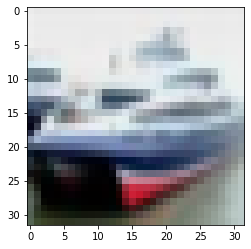

In [25]:
my_number = x_test[1]
plt.imshow(my_number.reshape(32,32,3))

In [26]:
model.predict_classes(my_number.reshape(1,32,32,3))

array([1])